# TPE WEB MINING (DSI 553) - Groupe 1

## 1) Importation des données

In [188]:
import pandas as pd

dataset = pd.read_csv("C:/Users/Djafar/Downloads/data_set.csv", encoding = "utf-8")
dataset.head()

,Id_Commentaire,Commentaires,Sentiments
0,1,"J'adore ce produit, il est incroyable !",+
1,2,"Super achat, je le recommande vivement.",+
2,3,Vous êtes vraiment cool !,+
3,4,Ce produit répond parfaitement à mes attentes.,+
4,5,Je suis impressionné par la qualité de cet art...,+


## 2) Prétraitement des données chargées

### 2.1) Retrait des mots-vides

Ci dessous la fonction nous permettant de prétraiter nos données (les commentaires) en retirant tout ce qui est superflu et en les normalisant.

In [34]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import spacy
# ------------- Chargement du lemmatiseur en français de la librairie spacy ---------------------
lemmatizer = spacy.load('fr_core_news_md')
# ------------- Chargement de la librairie de gestion des mots vides en français ---------------
mots_vides = nltk.corpus.stopwords.words('french')
# ------------- Définition de la fonction de nettoyage des mots (retrait des caractères spééciaux, retrait mots vides, lemmatiseur)
def nettoyeur_de_mots(text):
# ------------- Retrait des caractères de ponctuation -----------------------------------------
    text = text.translate(str.maketrans('', '', string.punctuation)).lower() 
# ------------- lemmatisation du texte --------------------------------------------------------
    tokens = [token.lemma_ for token in lemmatizer(text)]
# ------------- Retrait des mots-vides -------------------------------------------------------
    filtered_tokens = [token for token in tokens if token not in mots_vides]
    return " ".join(filtered_tokens)


### 2.2) Normalisation de la notation des sentimenst + et - par 1 et 0 respectivement

In [189]:
# --------------- Dans la fonction lambda on remplace + par 1 et - par 0 --------------------
dataset['Sentiments'] = dataset['Sentiments'].apply(lambda x:"positif" if (x == '+') else "negatif")
dataset.tail(20)

,Id_Commentaire,Commentaires,Sentiments
80,81,"Livraison rapide et emballage soigné, je suis ...",positif
81,82,Un excellent rapport qualité-prix pour ce prod...,positif
82,83,"Je suis totalement satisfait de mon achat, mer...",positif
83,84,"C'est exactement ce que je cherchais, je suis ...",positif
84,85,"Ce produit est génial, je ne peux plus m'en pa...",positif
85,86,L'article que j'ai reçu ne correspond pas du t...,negatif
86,87,"Le service client est injoignable, aucune répo...",negatif
87,88,La qualité de fabrication de ce produit est mé...,negatif
88,89,"Le colis est arrivé en mauvais état, le produi...",negatif
89,90,"Ce produit est une arnaque, il ne fonctionne p...",negatif


## 3) Subdivision du jeu de données en en données d'entraînement et de test

In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset['Commentaires'].apply(nettoyeur_de_mots), dataset['Sentiments'], test_size = 0.2, train_size = 0.8, random_state = 66)

In [166]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [167]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

## 4) Constrisons un modèle de classification selon l'algorithme du Classifieur Naïf de Bayesien (CNB)

In [168]:
from sklearn.naive_bayes import MultinomialNB

In [169]:
cnb = MultinomialNB()
cnb.fit(X_train, y_train)

MultinomialNB()

## 5) Générons la matrice de confusion du modèle

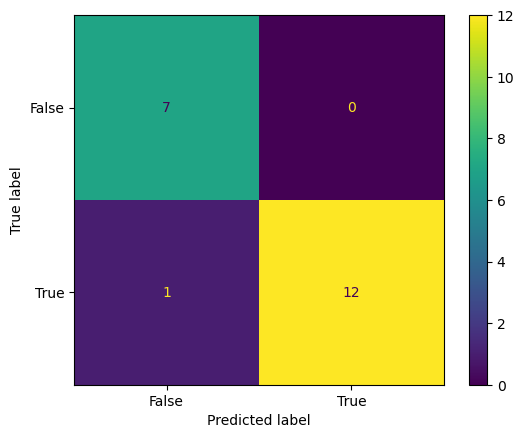

In [177]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true=y_test, y_pred=cnb.predict(X_test))

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

## 7) Imprimons les rapports de la classification puis évaluons la performance du modèle utilisé.

In [182]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
y_pred = cnb.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred, average='weighted'))

Accuracy:  0.95
Precision:  0.95625
Recall:  0.95


## 8) Utiliser votre modèle entraîné pour prédire le sentiment des commentaires non étiquetés suivants :
- "Ce produit est incroyable !"
- "Je suis déçu de mon achat."
- "Le service client est exceptionnel."
- " Vous êtes le meilleur"

In [172]:
X = ["Ce produit est incroyable !", "Je suis déçu de mon achat.", "Le service client est exceptionnel.", " Vous êtes le meilleur"]
X = vectorizer.transform(map(nettoyeur_de_mots, X))

In [173]:
y_pred = cnb.predict(X)
print(y_pred)

['positif' 'negatif' 'positif' 'positif']
